<a href="https://colab.research.google.com/github/erdcpatel/PythonDataScience/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx+b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

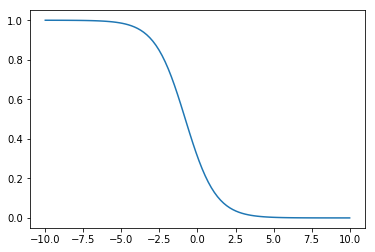

In [4]:
w = -1 #@param {type: "slider", min: -2, max: 2 , step: 0.1}
b = -0.8 #@param {type: "slider", min: -2, max: 2, step: 0.1}

X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [0]:
from mpl_toolkits import mplot3d

In [7]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

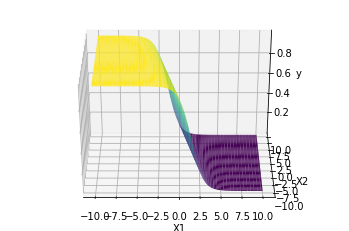

In [8]:
w1 = -1.4 #@param {type: "slider", min: -2, max: 2 , step: 0.1}
w2 = -0.2 #@param {type: "slider", min: -2, max: 2 , step: 0.1}
b = 0
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1 , XX2 = np.meshgrid(X1,X2)

#Y = sigmoid_2d(XX1, XX2, w1, w2, b)
#print(X1.shape , X2.shape, XX1.shape, XX2.shape)

Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y , cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

ax.view_init(30,270)

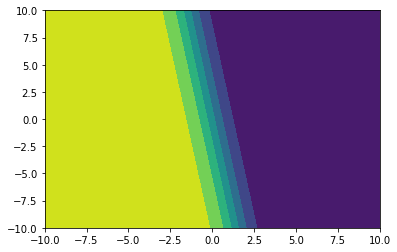

In [9]:
plt.contourf(XX1, XX2, Y)
plt.show()

# Compute Loss for Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.np.random.random(25) * 20 -10
Y = sigmoid(X, w_unknown, b_unknown)

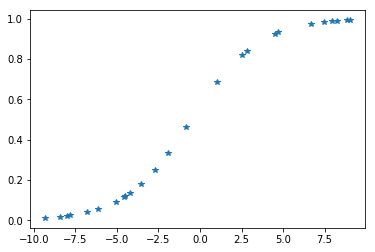

In [11]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est)) ** 2
  return loss

In [0]:
W = np.linspace(-1, 1, 100)
B = np.linspace(-1, 1, 100)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j]) 

Text(0.5, 0, 'Loss')

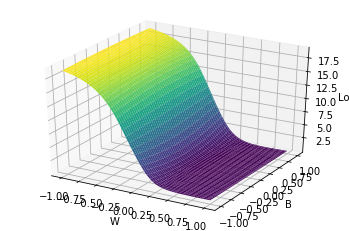

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss , cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

#ax.view_init(30,270)

# Class for Sigmoid Neoron

In [0]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x,self.w.T) + self.b

  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=False):
    #Initialize
    if initialize:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0

      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)

      self.w -= learning_rate * dw
      self.b -= learning_rate * db

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)

    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  

# Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1,1,1,0,0,0]

In [18]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [19]:
print(sn.w, sn.b)

[[-1.93453854  2.07694096]] [0.03170897]


In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)

  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y)
  ax.plot()



[[ 1.95089989 -0.55481337]] [-0.06925815]



[[ 1.93591622 -0.72258304]] [-0.12723499]



[[ 1.99732133 -0.64351587]] [-0.17284101]



[[ 2.01192867 -0.68898207]] [-0.21320549]



[[ 2.04089869 -0.68417522]] [-0.24917412]



[[ 2.06272836 -0.69466674]] [-0.28247225]



[[ 2.08432591 -0.70093595]] [-0.31329337]



[[ 2.10439142 -0.707429  ]] [-0.3420004]



[[ 2.12332082 -0.71347596]] [-0.36883393]



[[ 2.14121603 -0.71919393]] [-0.39400506]



[[ 2.1581867 -0.7246135]] [-0.41769158]



[[ 2.17432526 -0.72976441]] [-0.44004527]



[[ 2.18971119 -0.73467225]] [-0.46119657]



[[ 2.20441329 -0.7393592 ]] [-0.48125831]



[[ 2.21849147 -0.7438446 ]] [-0.50032867]



[[ 2.23199819 -0.74814541]] [-0.51849355]



[[ 2.24497964 -0.75227655]] [-0.53582851]



[[ 2.25747666 -0.75625124]] [-0.55240033]



[[ 2.26952555 -0.76008125]] [-0.56826827]



[[ 2.28115871 -0.76377707]] [-0.58348518]


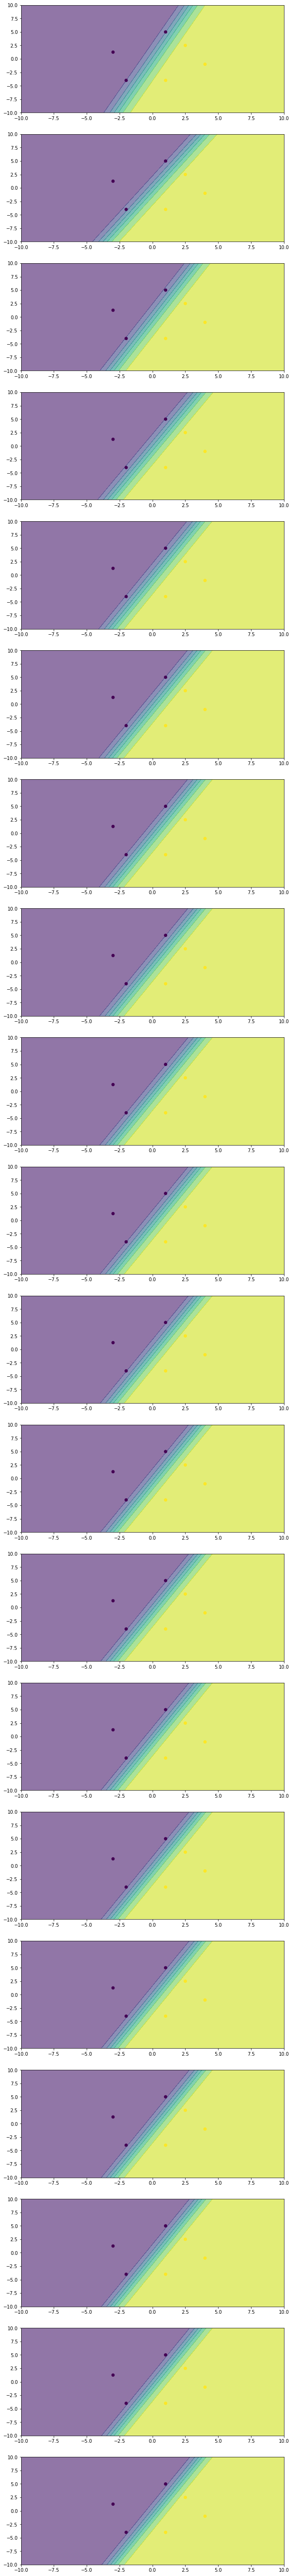

In [21]:
sn.fit(X, Y, 1, 0.75, True)
N = 20
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1 , i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.75, False)

# Load Data

In [0]:
data = pd.read_csv('mobiledata_cleaned.csv')

In [23]:
data.head()

,Unnamed: 0,PhoneId,Screen to Body Ratio (calculated),Height,RAM,Processor_frequency,Pixel Density,Internal Memory,Screen Size,Weight,Capacity,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Rating
0,0,0,80.68,157.9,4,1.8,403,64,6.26,182,4000,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,4.5
1,1,1,80.85,156.2,3,1.8,271,32,6.20,168,4230,8,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,4.5
2,2,2,83.68,157.0,3,2.1,409,32,6.30,168,3500,25,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,4.4
3,3,4,74.78,159.8,4,2.2,411,64,6.00,169,3300,24,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,4.3
4,4,5,84.23,160.4,4,2.2,396,64,6.50,175,3750,16,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,4.4


In [24]:
data.shape

(341, 89)

In [0]:
X = data.drop('Rating', axis=1)

In [0]:
Y = data['Rating'].values

In [0]:
threshold = 4.2
data['Class']  = (data['Rating'] >= threshold).astype(np.int)

In [28]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

# Standardisation

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
R = np.random.random([100,1])

In [32]:
R

array([[0.66604832],
       [0.69038246],
       [0.68743898],
       [0.23175576],
       [0.82941353],
       [0.36870583],
       [0.47203639],
       [0.04433032],
       [0.74602062],
       [0.42649025],
       [0.04543325],
       [0.74155162],
       [0.97838246],
       [0.01810948],
       [0.76923296],
       [0.17283857],
       [0.14017672],
       [0.15328045],
       [0.78503714],
       [0.21278525],
       [0.0875761 ],
       [0.2301063 ],
       [0.47264034],
       [0.51739371],
       [0.33076067],
       [0.08007942],
       [0.47744908],
       [0.34543963],
       [0.35323123],
       [0.02666079],
       [0.11087808],
       [0.06036544],
       [0.99856107],
       [0.82991837],
       [0.50316512],
       [0.83746678],
       [0.00350174],
       [0.45512097],
       [0.27821662],
       [0.54364487],
       [0.58354633],
       [0.60164169],
       [0.34370886],
       [0.86325936],
       [0.63224372],
       [0.7225718 ],
       [0.72495016],
       [0.786

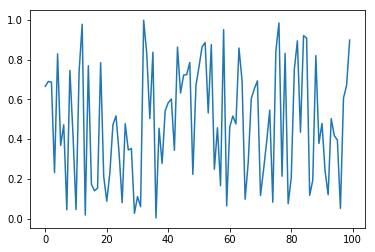

In [33]:
plt.plot(R)
plt.show()

In [34]:
np.mean(R)

0.4835996069200727

In [35]:
np.std(R)

0.2909032172801729

In [36]:
scaler = StandardScaler()
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
scaler.mean_

array([0.48359961])

In [0]:
RT = scaler.transform(R)

In [39]:
np.mean(RT)

-4.551914400963141e-16

In [40]:
np.std(RT)

1.0

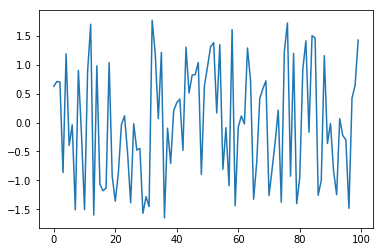

In [41]:
plt.plot(RT)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [43]:
print(X_train.shape, X_test.shape)

(255, 88) (86, 88)


In [0]:
scaler = StandardScaler()

In [0]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [0]:
scaled_thresold = list(minmax_scaler.transform(np.array([threshold]).reshape(1,-1)))[0][0]

In [50]:
scaled_thresold

0.6800000000000002

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_thresold).astype("int").ravel()

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_thresold).astype("int").ravel()

# Train on Real Data

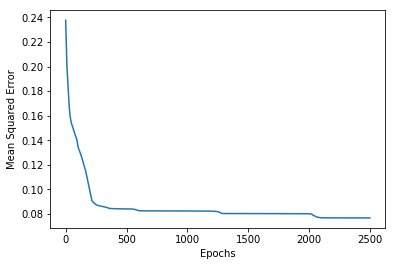

In [53]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train,Y_scaled_train, epochs=2500, learning_rate=0.015, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_thresold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_thresold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [57]:
print(accuracy_train,accuracy_test)

0.7803921568627451 0.8023255813953488
